In [7]:
import numpy as np
import pandas as pd

In [8]:
df= pd.read_csv('/content/spam.csv', encoding="ISO-8859-1")


In [9]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
470,spam,okmail: Dear Dave this is your final notice to...,NaN,NaN,NaN
935,ham,Then dun wear jeans lor...,NaN,NaN,NaN
2963,spam,"Do you ever notice that when you're driving, a...",NaN,NaN,NaN
394,ham,Pick you up bout 7.30ish? What time are and t...,NaN,NaN,NaN
260,ham,Yup,NaN,NaN,NaN


In [10]:
df.shape

(5572, 5)

 ## **1. Data Cleaning**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [13]:
df.shape

(5572, 2)

In [14]:
df.sample(5)

,v1,v2
15,spam,"XXXMobileMovieClub: To use your credit, click ..."
5198,ham,She.s fine. I have had difficulties with her p...
2994,ham,Mm not entirely sure i understood that text bu...
531,ham,What Today-sunday..sunday is holiday..so no wo...
133,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...


In [15]:
# renaming columns

df.rename(columns={ 'v1':'target','v2': 'text'},inplace=True)
df.sample(2)

,target,text
2380,ham,"If i let you do this, i want you in the house ..."
269,spam,Ringtone Club: Get the UK singles chart on you...


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [17]:
df['target']=encoder.fit_transform(df['target'])

In [18]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [19]:
#duplicate values
df.duplicated().sum()

403

In [20]:
#removing duplicates
df=df.drop_duplicates(keep='first')

In [21]:
df.shape

(5169, 2)

## **EDA**

In [22]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [23]:
import matplotlib.pyplot as plt

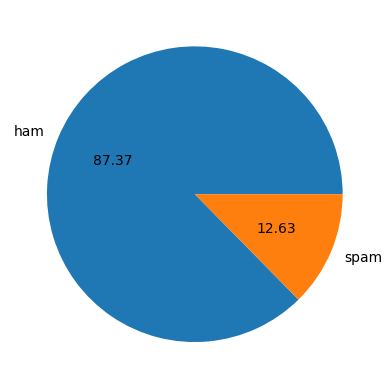

In [26]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [27]:
# Data is imbalance



In [28]:
import nltk

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [31]:
# no of characters

df['num_characters']=df['text'].apply(len)

In [33]:
# no of words

df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [34]:
# no of sentences

df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [35]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
#spam

df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [40]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

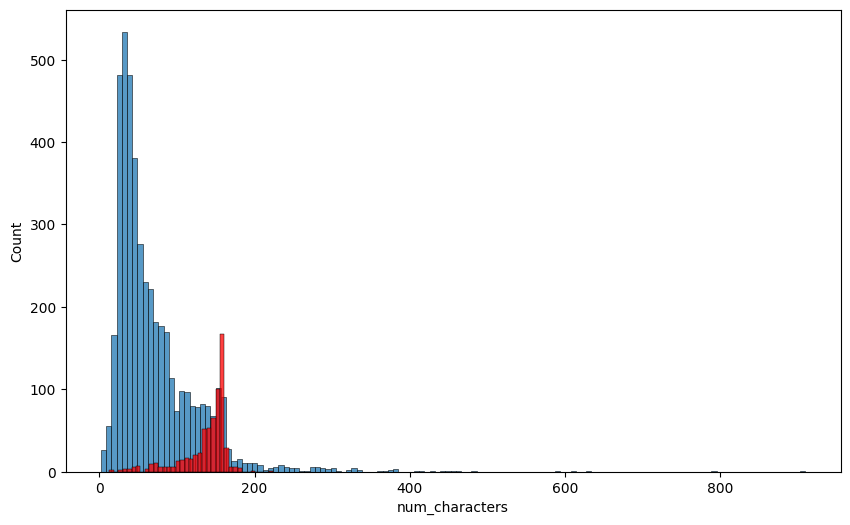

In [45]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

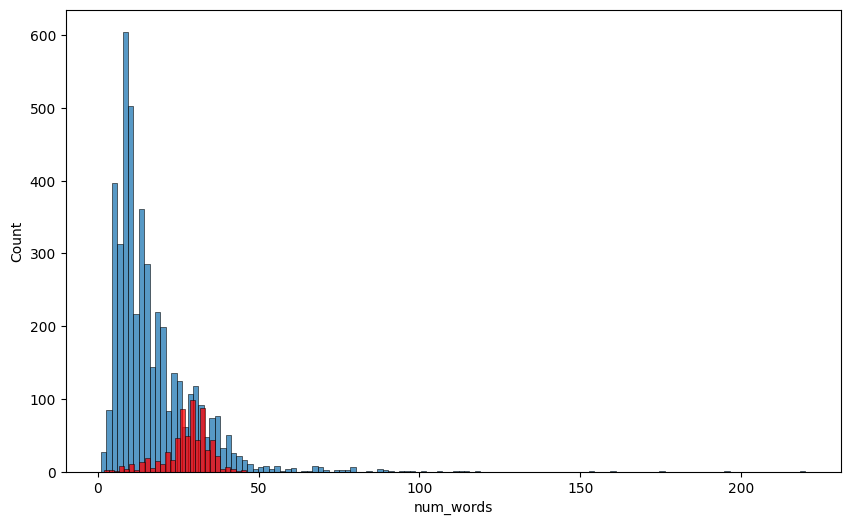

In [46]:
plt.figure(figsize=(10,6))

sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

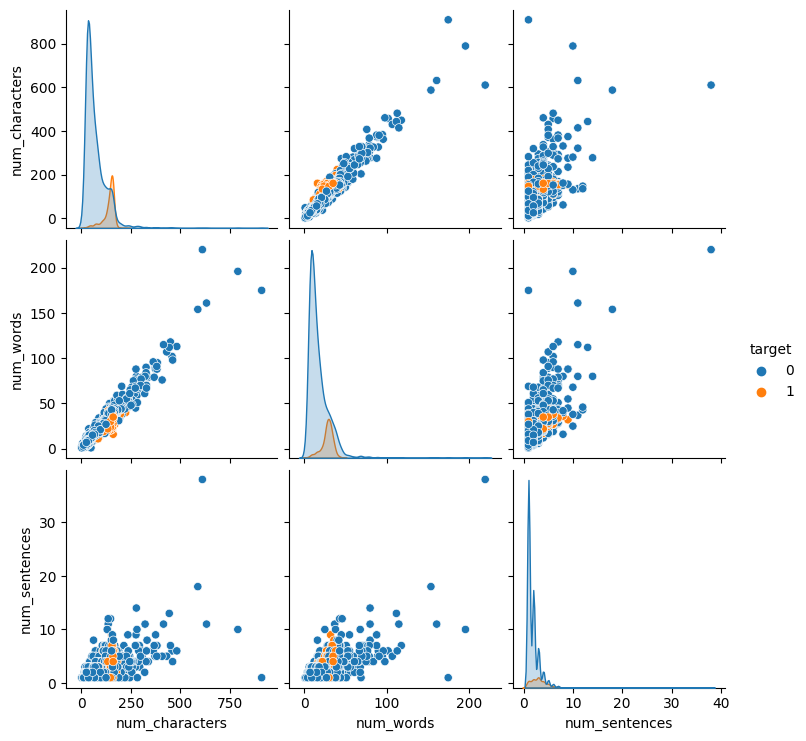

In [47]:
sns.pairplot(df,hue='target')

<ipython-input-48-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

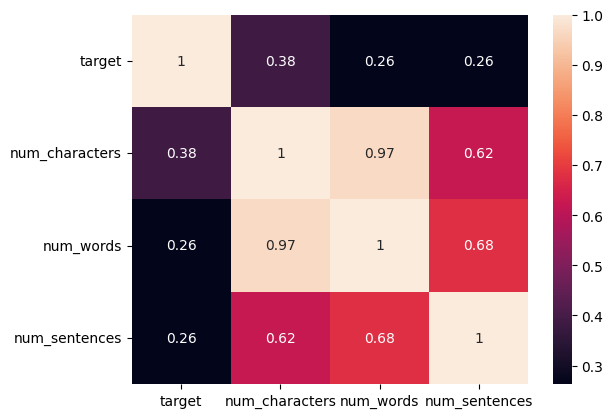

In [48]:

sns.heatmap(df.corr(), annot=True)

## **TEXT PREPROCESSING**

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

In [54]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()



In [61]:
def transform_text(text):

  text=text.lower()

  text=nltk.word_tokenize(text)

  y=[]

  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()


  for i in text:
    y.append(ps.stem(i))



  return " ".join(y)



In [63]:
df['transformed_text']=df['text'].apply(transform_text)

In [64]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [68]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [69]:
spam_wc=wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

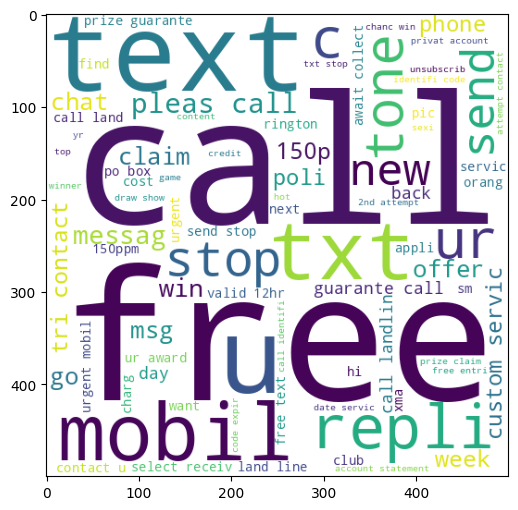

In [72]:
# for Spam

plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

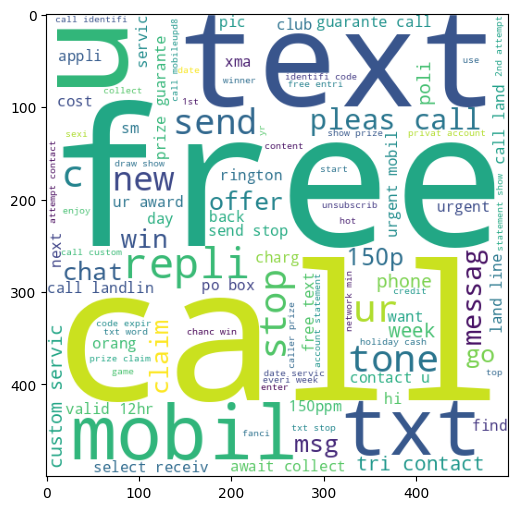

In [73]:
# for ham

ham_wc=wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [77]:
#spam

spam_corpus= []
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)